In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('hmelq_clean.csv')

In [3]:
df.head(3)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,29.311,64.074,16.199,HomeImp,Other,28.000,0.000,0.000,18.711,0.000,14.000,13.321
1,0,19.771,112.857,16.569,DebtCon,Other,2.000,0.000,0.000,18.002,0.000,25.000,13.443
2,0,21.390,86.871,14.924,DebtCon,Other,5.000,0.000,0.000,15.992,2.000,9.000,11.077


### Dummy

In [4]:
dfCopy = df.copy()

dms = pd.get_dummies(dfCopy[['reason','job']])
Xn_ = dfCopy.drop(['reason','job'], axis=1)
dfDummy = pd.concat([Xn_,dms], axis=1)
dfDummy = dfDummy.drop(['reason_DebtCon'], axis=1)

In [5]:
dfDummy.head(3)

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,29.311,64.074,16.199,28.000,0.000,0.000,18.711,0.000,14.000,13.321,1,0,0,1,0,0,0
1,0,19.771,112.857,16.569,2.000,0.000,0.000,18.002,0.000,25.000,13.443,0,0,0,1,0,0,0
2,0,21.390,86.871,14.924,5.000,0.000,0.000,15.992,2.000,9.000,11.077,0,0,0,1,0,0,0


## Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
y = dfDummy.bad
X = dfDummy.drop(['bad'], axis=1)

model = DecisionTreeClassifier()

In [8]:
aio.confusion(X, y, model)

Accuracy: 0.86732 | AUC: 0.77770


,pred_0,pred_1,precision,recall,f1-score,support
0,541,50,0.923,0.915,0.919,591.000
1,45,80,0.615,0.640,0.627,125.000


In [44]:
dfModel = pd.DataFrame(columns = ['cross-val', 'train_score', 'test_score', 'precision', 'recall', 'f1-score', 'auc-roc', 'auc-pr'])

In [45]:
y = dfDummy.bad
X = dfDummy.drop(['bad'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'log'))

In [46]:
y = dfDummy.bad
X = dfDummy.drop(['bad'], axis=1)
model = DecisionTreeClassifier()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'dtree'))

In [47]:
dfModel

,cross-val,train_score,test_score,precision,recall,f1-score,auc-roc,auc-pr
log,0.837,0.839,0.853,0.647,0.352,0.456,0.782,0.539
dtree,0.864,1.000,0.865,0.608,0.632,0.620,0.773,0.652


### Parametreler

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [106]:
y = dfDummy.bad
X = dfDummy.drop(['bad'], axis=1)

dtree = DecisionTreeClassifier()
params = {'min_samples_split': [2, 4, 8, 16, 32, 48, 64], 'max_depth': [2, 4, 8, 16, 32, 48, 64], 'min_samples_leaf': [2, 8, 16, 32, 48, 64]}

In [107]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = dtree, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)

In [108]:
gridcv_results.best_params_

{'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 64}

In [52]:
model = DecisionTreeClassifier(max_depth=32, min_samples_leaf=2, min_samples_split=2)

dfModel = dfModel.append(aio.modelframe(X, y, model, 'dtree_p1'))

In [55]:
model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=2)

dfModel = dfModel.append(aio.modelframe(X, y, model, 'dtree_p2'))

In [58]:
model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=2)

dfModel = dfModel.append(aio.modelframe(X, y, model, 'dtree_p3'))

In [60]:
model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=2)

dfModel = dfModel.append(aio.modelframe(X, y, model, 'dtree_p4'))

In [109]:
model = DecisionTreeClassifier(max_depth=16, min_samples_leaf=16, min_samples_split=64)

dfModel = dfModel.append(aio.modelframe(X, y, model, 'dtree_p5'))

In [110]:
dfModel

,cross-val,train_score,test_score,precision,recall,f1-score,auc-roc,auc-pr
log,0.83724,0.83916,0.85335,0.64706,0.35200,0.45596,0.78166,0.53855
dtree,0.86410,1.00000,0.86453,0.60769,0.63200,0.61961,0.77285,0.65197
dtree_p1,0.86045,0.97832,0.87570,0.65517,0.60800,0.63071,0.79820,0.67162
dtree_p2,0.87444,0.91853,0.88268,0.67521,0.63200,0.65289,0.86647,0.67741
dtree_p3,0.87640,0.91993,0.87849,0.66102,0.62400,0.64198,0.85755,0.66003
dtree_p4,0.87137,0.91329,0.86034,0.61468,0.53600,0.57265,0.85013,0.62594
dtree_p5,0.88031,0.89545,0.89106,0.71171,0.63200,0.66949,0.88810,0.71272


In [111]:
dtree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=2)
params = {'max_depth': range(1,50)}

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = dtree, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)

grid_cv = pd.DataFrame(gridcv_results.cv_results_)
#grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_sort = grid_cv.sort_values(by=['param_max_depth'])

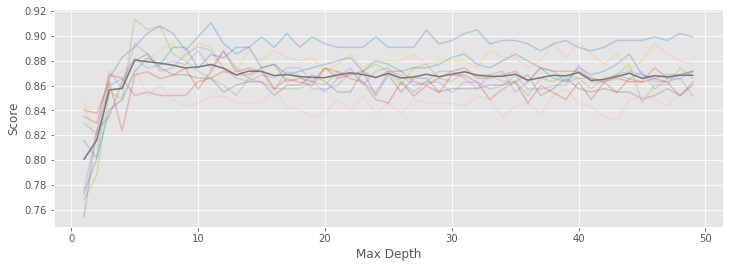

In [112]:
plt.figure(figsize=(12,4))
plt.plot(range(1,50), grid_sort.iloc[:,6:16], alpha=0.3)
plt.plot(range(1,50), grid_sort.iloc[:,16])
plt.xlabel('Max Depth')
plt.ylabel('Score');

## Sonuç

- Logistik regresyon değerlerine göre daha iyi sonuçlar gözlemlendi. Hem score olarak hem de iyi performans beklentisi olan recall değeri için oldukça iyi sonuçlar alındı. Kötü müşterilerin tahmini için iyi conf. matrix daha kabul edilebilir değerler verdi.
- Karar ağacı modellerinin dezavantajı overfit yaşanmasıdır. Model eğitilirken, parametre ayarlaması yapılmadığı için bu veri seti için de overfit yaşandı, bu sorun parametre iyileştirmeleri ile aşıldı.
- Dengesiz veriler için incelenen auc-pr değerinde iyileşme yaşandı.
- Maliyet kaynaklı parametrik değişiklikler ile en iyi recall alınmaya çalışıldı. En iyi performans bu parametrelerde gözlemlendi:
    - maxdepth=16, minsamplesleaf=16, minsamplessplit=64
- Cross bölünme yapılmış 10 farklı test seti üzerinde maxdepth davranışı incelendi. Overfit'in önüne geçebilmek için çok yüksek-düşük performanslar optimize edildi ve ortalama değer grafikleştirildi. 0.91 ve 0.83 aralığında değişen score değeri için en optimum değer 0.88 olarak sonuçlandı.